# Setup

In [105]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations
from collections import Counter

##### Merge 12 months of sales data into a single file

In [106]:
files = [file for file in os.listdir('Data')]

sales_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(f'Data/{file}')
    sales_data = pd.concat([sales_data, df])

sales_data.to_csv('Data/sales_data.csv', index=False) # will not create new column for index num

##### Read in merged sales data

In [107]:
data = pd.read_csv('Data/sales_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [108]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

# Data Cleaning

##### Remove rows with NaN values

In [109]:
# Find NaN values
data[data.isna().any(axis = 1)]

# Drop rows with NaN values
data = data.dropna(how = 'all')

##### Remove rows with column names as values

In [110]:
data = data[data['Order Date'].str[:2] != 'Or']

##### Convert column data types

In [111]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

##### Add additional columns to dataframe

In [112]:
# Add month column
data['Month'] = data['Order Date'].str[:2].astype('int32')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [113]:
# Add revenue column
data['Revenue'] = data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [114]:
# Add city column
data['City'] = data['Purchase Address'].apply(lambda x: f'{x.split(",")[1]} {x.split(",")[2].split()[0]}')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [118]:
# Convert to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Add hour and minute columns
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


# Analysis

#####  Find the best month for sales

In [119]:
monthly_sales = data.groupby('Month').sum()
monthly_sales

,Quantity Ordered,Price Each,Revenue,Hour,Minute
Month,,,,,
1,10903,1811768.38,1822256.73,139485,282440
2,13449,2188884.72,2202022.42,172669,354885
3,17005,2791207.83,2807100.38,218969,447559
4,20558,3367671.02,3390670.24,262259,544186
5,18667,3135125.13,3152606.75,238780,487899
6,15253,2562025.61,2577802.26,195528,402436
7,16072,2632539.56,2647775.76,206169,417349
8,13448,2230345.42,2244467.88,172289,353857
9,13109,2084992.09,2097560.13,168513,341698


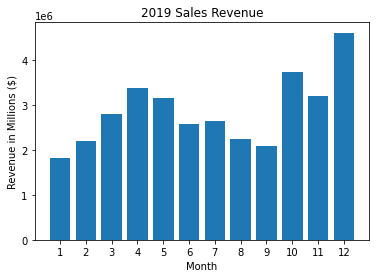

In [120]:
months = range(1, 13)

plt.bar(months, monthly_sales['Revenue'])
plt.title('2019 Sales Revenue')
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Revenue in Millions ($)')
plt.show()

# Holiday months (October - December) generate the most revenue 
# January has the lowest amount of revenue

##### Find city with the highest revenue

In [121]:
city_sales = data.groupby('City').sum()
city_sales

,Quantity Ordered,Price Each,Month,Revenue,Hour,Minute
City,,,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58,214264,442932
Austin TX,11153,1809873.61,69829,1819581.75,141946,289060
Boston MA,22528,3637409.77,141112,3661642.01,288225,590442
Dallas TX,16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles CA,33289,5421435.23,208325,5452570.80,427444,866638
New York City NY,27932,4635370.83,175741,4664317.43,357696,733598
Portland ME,2750,447189.25,17144,449758.27,35211,72856
Portland OR,11303,1860558.22,70621,1870732.34,144421,295533
San Francisco CA,50239,8211461.74,315520,8262203.91,643265,1319477


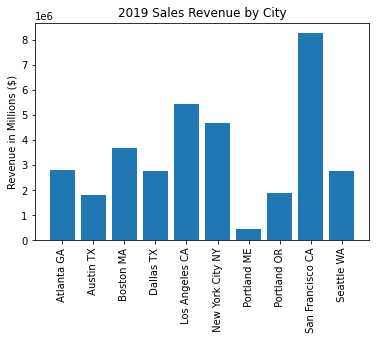

In [125]:
# cities = [city for city, df in data.groupby('City')]
cities = city_sales.index.values

plt.bar(cities, city_sales['Revenue'])
plt.title('2019 Sales Revenue by City')
plt.xticks(rotation = 'vertical')
plt.ylabel('Revenue in Millions ($)')
plt.show()

# San Francisco generates the most revenue, possibly due to being a tech hub. 
# City size may play a role, as larger cities have generally have more renvenue
# Portland ME has the lowest revenue, possibly due to small population, location

##### Find best time of day to display advertisements

In [126]:
# Amount of orders per hour
data.groupby('Hour')['Order ID'].count()

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

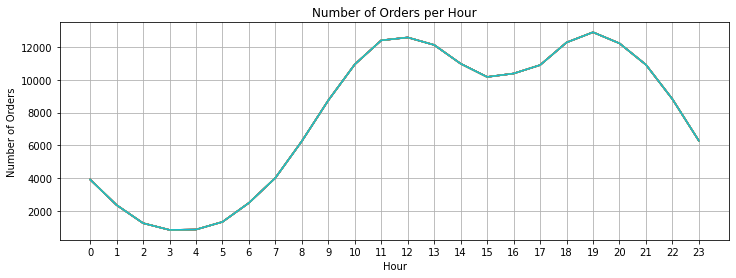

In [127]:
hours = [hour for hour, df in data.groupby('Hour')]

f = plt.figure()
f.set_figwidth(12)

plt.plot(hours, data.groupby('Hour').count())
plt.title('Number of Orders per Hour')
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# Best time to advertise is evident by the peaks: 10AM-12PM, 5-7PM

##### Find best selling products

In [60]:
# Price list for each item
data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [43]:
# Items ranked by amount sold
data.groupby('Product')[['Quantity Ordered', 'Revenue']].sum().sort_values(by = 'Quantity Ordered', ascending = False)

,Quantity Ordered,Revenue
Product,,
AAA Batteries (4-pack),31017,92740.83
AA Batteries (4-pack),27635,106118.40
USB-C Charging Cable,23975,286501.25
Lightning Charging Cable,23217,347094.15
Wired Headphones,20557,246478.43
Apple Airpods Headphones,15661,2349150.00
Bose SoundSport Headphones,13457,1345565.43
27in FHD Monitor,7550,1132424.50
iPhone,6849,4794300.00


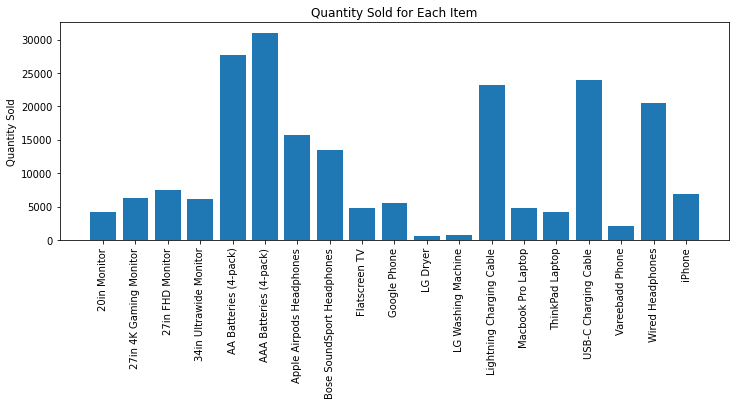

In [54]:
product_group = data.groupby('Product')

n_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

f = plt.figure()
f.set_figwidth(12)

plt.bar(products, n_ordered)
plt.title('Quantity Sold for Each Item')
plt.xticks(rotation = 'vertical')
plt.ylabel('Quantity Sold')
plt.show()

# Batteries are the best selling items, as they are cheap and a component of many electronics
# Cables and headphones also sell in large quantities
# Appliances are the lowest selling items, large size may be a factor as stores will not be able to stock large quantities

##### Look for a correlation between price and quantity sold

C:\Users\17325\AppData\Local\Temp/ipykernel_4276/3390578101.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products, prices, 'b-', color = 'orange', linewidth = 3)
C:\Users\17325\AppData\Local\Temp/ipykernel_4276/3390578101.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical')


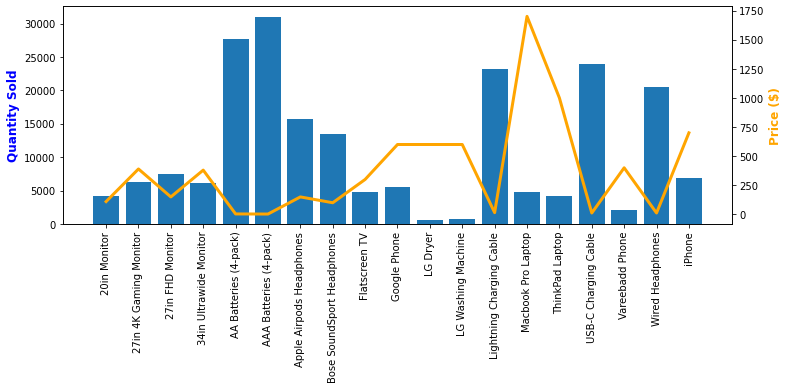

In [97]:
prices = data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()
fig.set_figwidth(12)
ax2 = ax1.twinx()
ax1.bar(products, n_ordered)
ax2.plot(products, prices, 'b-', color = 'orange', linewidth = 3)

ax1.set_xticklabels(products, rotation = 'vertical')
ax1.set_ylabel('Quantity Sold', color = 'blue', fontweight = 'bold', size = 12)
ax2.set_ylabel('Price ($)', color = 'orange', fontweight = 'bold', size = 12)

plt.show()

# There is a general trend: negative correlation between quantity sold and price
# Macbook Pro is a great seller in consideration to its high price

##### Find products that generate the most revenue

In [44]:
data.groupby('Product')[['Quantity Ordered', 'Revenue']].sum().sort_values(by = 'Revenue', ascending = False)

,Quantity Ordered,Revenue
Product,,
Macbook Pro Laptop,4728,8037600.00
iPhone,6849,4794300.00
ThinkPad Laptop,4130,4129958.70
Google Phone,5532,3319200.00
27in 4K Gaming Monitor,6244,2435097.56
34in Ultrawide Monitor,6199,2355558.01
Apple Airpods Headphones,15661,2349150.00
Flatscreen TV,4819,1445700.00
Bose SoundSport Headphones,13457,1345565.43


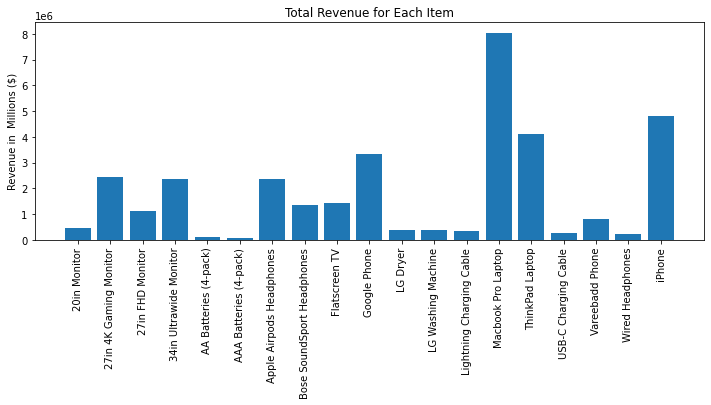

In [61]:
product_group = data.groupby('Product')

total_revenue = product_group.sum()['Revenue']
products = [product for product, df in product_group]

f = plt.figure()
f.set_figwidth(12)

plt.bar(products, total_revenue)
plt.title('Total Revenue for Each Item')
plt.xticks(rotation = 'vertical')
plt.ylabel('Revenue in  Millions ($)')
plt.show()

# Macbook Pro, iPhone, ThinkPad Laptop, and Google Phone are in the elite class of revenue generators
# Macbook Pro almost doubles the revenue of the 2nd best selling item 
# Accessories generate the lowest revenue despite the large amount of quantity sold

##### Find products that are commonly sold together

- Products that are sold together have the same Order ID

In [128]:
# Create data frame with only order IDs that have at least 2 products (rows)
multiple_items = data[data['Order ID'].duplicated(keep = False)]

# Create column with combined products for each order ID
multiple_items['Products'] = multiple_items.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Remove the other columns
multiple_items = multiple_items[['Order ID', 'Products']].drop_duplicates()

pd.options.display.max_colwidth = 100
multiple_items.head()

C:\Users\17325\AppData\Local\Temp/ipykernel_4276/1257587516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_items['Products'] = multiple_items.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Headphones"
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [35]:
# Count the combinations of bought items
count = Counter()

# Find most items bought together (groups of 2)
for row in multiple_items['Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)
    
# Phones sell in tandom with charging cables and headphones

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [38]:
# Now lets find the most common groups of 3 items bought together:
count = Counter()

for row in multiple_items['Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))
    
for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


# Conclusions

- Holiday months (October - December) generate the most revenue 
- San Francisco generates the most revenue, possibly due to being a tech hub. 
- City size may play a role in revenue generated
- Best time to advertise is evident by the peaks: 10AM-12PM, 5-7PM
- Batteries are the best selling items, as they are cheap and a component of many electronics
- Cables and headphones also sell in large quantities, especially in combination with cell phones
- Appliances are the lowest selling items, large size may be a factor as stores will not be able to stock large quantities
- As expected, negative correlation between quantity sold and price
- Macbook Pro is a great seller in consideration to its high price
- Macbook Pro, iPhone, ThinkPad Laptop, and Google Phone are in the elite class of revenue generators
- Accessories generate the lowest revenue despite the large amount of quantity sold

### Room for further analysis:

- find cost of each item and compare profit margins
- compare city size to revenue generated
